# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_quarterly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_quarterly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [3]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [2]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [3]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [4]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [5]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [6]:
dataname_a = "m4_quarterly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.


24000

In [10]:
dataname_b1 = "m4_quarterly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.


5315

In [11]:
dataname_b2 = "m4_quarterly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.


6020

In [7]:
dataname_b3 = "m4_quarterly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.


865

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 24000
length test: 24000

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


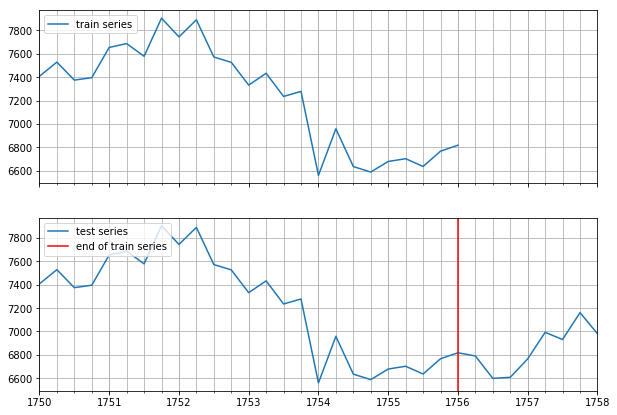

In [9]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 5315
length test: 5315

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


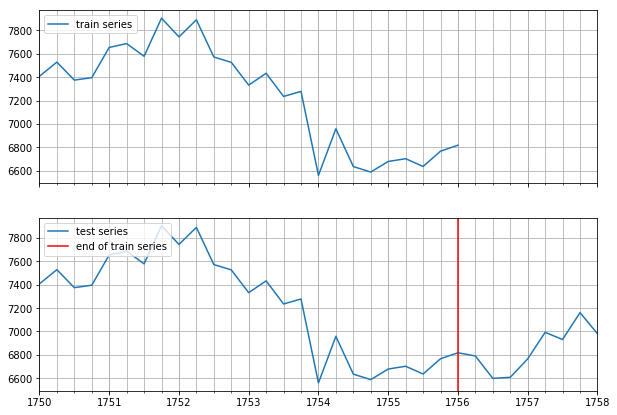

In [10]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [11]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [8]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [9]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='24000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f649bae10f0>, test=<gluonts.dataset.common.FileDataset object at 0x7f648d76a2e8>)


NameError: name 'dataset_b' is not defined

In [10]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm


NameError: name 'dataname_b1' is not defined

In [11]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [12]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm


NameError: name 'dataname_b1' is not defined

## Study 1: `m4_quarterly_atm` vs. `m4_quarterly_macro` trained network

- Alternating between Run I - 10 trials A:B vs. 
- Run II - 10 trials of B:B


In [1]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 2: `m4_quarterly_atm` vs. `m4_quarterly_micro` trained network

- Alternating between A:B and B:B

In [2]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 3: `m4_quarterly_atm` vs `m4_quarterly_other`

- Alternating between A:B and B:B

In [14]:
results = pd.DataFrame()

for i in range(44,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 200/200 [00:14<00:00, 14.05it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[0] Elapsed time 14.240 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.746022
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:16<00:00, 12.34it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[1] Elapsed time 16.218 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.187622
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 16.67it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 12.000 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.189188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.37it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[3] Elapsed time 13.927 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.081858
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.88it/s, avg_epoch_l

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 13.32it/s, avg_epoch_loss=6.6] 
INFO:root:Epoch[37] Elapsed time 15.025 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.600313
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:14<00:00, 14.24it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[38] Elapsed time 14.044 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.474218
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.95it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 15.454 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.593095
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:14<00:00, 13.62it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[40] Elapsed time 14.693 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.650554
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.95it/s, avg_epoch_loss=6.56

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.498333
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:17<00:00, 11.69it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 17.114 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.522221
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:13<00:00, 14.68it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[75] Elapsed time 13.628 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.438365
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:14<00:00, 13.75it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[76] Elapsed time 14.554 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.485106
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:14<00:00, 13.41it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 14.917 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.474297
INFO:root:Epoch[78] Learning rate is 0.0005
100%

INFO:root:Epoch[110] Learning rate is 0.00025
100%|██████████| 200/200 [00:17<00:00, 11.44it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[110] Elapsed time 17.486 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.477831
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:15<00:00, 13.15it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[111] Elapsed time 15.217 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.528778
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:15<00:00, 13.24it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[112] Elapsed time 15.111 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.476450
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:14<00:00, 13.87it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[113] Elapsed time 14.426 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.339355
INFO:root:Epoch[114] Learning rate is 0.

100%|██████████| 200/200 [00:15<00:00, 12.69it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[145] Elapsed time 15.767 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.480068
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.81it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[146] Elapsed time 15.611 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.376423
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:12<00:00, 15.78it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[147] Elapsed time 12.676 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.366903
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.19it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[148] Elapsed time 16.422 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.541698
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.94it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[149] Elapsed 

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=6.446920
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.51it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[182] Elapsed time 15.993 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.429898
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.46it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[183] Elapsed time 16.057 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.410701
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.33it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[184] Elapsed time 16.226 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.349934
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.46it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 16.053 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.433325
INFO:root:Epoch[186] Learning rate is 5

100%|██████████| 200/200 [00:15<00:00, 13.10it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[218] Elapsed time 15.273 seconds
INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=6.317533
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:17<00:00, 11.61it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[219] Elapsed time 17.238 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.432178
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.22it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[220] Elapsed time 16.369 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.491991
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.10it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[221] Elapsed time 15.280 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.452930
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.63it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[222] Elapsed 

INFO:root:Epoch[254] Evaluation metric 'epoch_loss'=6.408228
INFO:root:Epoch[255] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.69it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[255] Elapsed time 13.627 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=6.332813
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.39it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[256] Elapsed time 16.153 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.491473
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:17<00:00, 11.17it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[257] Elapsed time 17.912 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.393798
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.55it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[258] Elapsed time 15.942 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.418718
INFO:root:Epoch[259] Learning rate is 5

100%|██████████| 200/200 [00:13<00:00, 14.47it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[291] Elapsed time 13.827 seconds
INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=6.462750
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.26it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[292] Elapsed time 10.400 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.401817
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.11it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[293] Elapsed time 11.696 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.307912
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 16.84it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[294] Elapsed time 11.885 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.421142
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:12<00:00, 16.43it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[295] Elapsed t

INFO:root:Epoch[327] Evaluation metric 'epoch_loss'=6.307127
INFO:root:Epoch[328] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 14.08it/s, avg_epoch_loss=6.4] 
INFO:root:Epoch[328] Elapsed time 14.212 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=6.404034
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.53it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[329] Elapsed time 15.966 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.490694
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 14.06it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[330] Elapsed time 14.229 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.366264
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.83it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[331] Elapsed time 14.471 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.442432
INFO:root:Epoch[332] Learning rate is 5

100%|██████████| 200/200 [00:12<00:00, 16.15it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[364] Elapsed time 12.396 seconds
INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=6.294728
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.35it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[365] Elapsed time 13.943 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.397995
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.52it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[366] Elapsed time 15.984 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.458413
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.84it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[367] Elapsed time 13.487 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.426453
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.43it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[368] Elapsed t

Running evaluation: 100%|██████████| 865/865 [00:16<00:00, 51.30it/s]

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.896309  0.064217  7.555647            0.060095            0.031717    44   

   epochs  num_batches        train data           eval data  
0     400          200  m4_quarterly_atm  m4_quarterly_other  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,0.896309,0.064217,7.555647,0.060095,0.031717,44,400,200,m4_quarterly_atm,m4_quarterly_other


In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 200/200 [00:05<00:00, 35.89it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[0] Elapsed time 5.577 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.618750
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 35.64it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 5.618 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.179689
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.97it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[2] Elapsed time 5.135 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.983434
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.41it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[3] Elapsed time 5.082 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.916413
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 36.35it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[4] Elapsed time 5.506 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 33.99it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[37] Elapsed time 5.889 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.396768
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 34.79it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[38] Elapsed time 5.755 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.355108
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.04it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[39] Elapsed time 5.404 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.357093
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 35.56it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[40] Elapsed time 5.628 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.361397
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 35.96it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[41] Elapsed time 5.569 seconds

100%|██████████| 200/200 [00:05<00:00, 34.74it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[74] Elapsed time 5.760 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.225358
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.78it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 5.159 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.198772
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.75it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[76] Elapsed time 5.168 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.204581
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.12it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[77] Elapsed time 5.392 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.202778
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 33.10it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[78] Elapsed time 6.046 seconds
I

100%|██████████| 200/200 [00:05<00:00, 36.17it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[111] Elapsed time 5.533 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.139179
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 36.45it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[112] Elapsed time 5.495 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.159668
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 34.76it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[113] Elapsed time 5.759 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.167005
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 35.05it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[114] Elapsed time 5.714 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.108847
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 33.53it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[115] Elapsed time

100%|██████████| 200/200 [00:05<00:00, 33.56it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[147] Elapsed time 5.966 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.110477
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 35.44it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[148] Elapsed time 5.650 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.061556
INFO:root:Loading parameters from best epoch (128)
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 34.04it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[149] Elapsed time 5.879 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.078111
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 32.52it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[150] Elapsed time 6.158 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.055274
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 32.

INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 36.97it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[183] Elapsed time 5.414 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.049086
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 36.37it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[184] Elapsed time 5.506 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.060896
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 38.24it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[185] Elapsed time 5.237 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.070648
INFO:root:Epoch[186] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 36.62it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[186] Elapsed time 5.466 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.047689
INFO:root:Epoch[187] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 35.58i

100%|██████████| 200/200 [00:05<00:00, 34.13it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[219] Elapsed time 5.867 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.016440
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.72it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[220] Elapsed time 5.776 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.063363
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.22it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[221] Elapsed time 5.529 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.038070
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.66it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[222] Elapsed time 5.775 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.071160
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 35.46it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.16it/s, avg_epoch_loss=6]
INFO:root:Epoch[256] Elapsed time 5.868 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.999434
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.34it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[257] Elapsed time 5.510 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.079684
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.63it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[258] Elapsed time 5.465 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.057304
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.65it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[259] Elapsed time 5.461 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.034524
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 33.93it/s, avg_epoch_los